# 1. Análisis de Componentes Principales (PCA)

PCA es una técnica de aprendizaje no supervisado que tiene como objetivo fundamental la reducción de dimensiones. 
Tiene una variedad de aplicaciones:
1. Reducción de la dimensionalidad
2. Visualización
3. Eliminar el ruido
4. Generar nuevos features en el dataset

##  Reducción de la dimensionalidad

Vamos a generar algunos puntos en dos dimensiones para tratar de dar una intuición acerca del funcionamiento de PCA.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
import pandas as pd

In [24]:
#Importamos IRIS data set
iris_dataset = datasets.load_iris()

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Dado que este dataset ya está "formateado" del modo que `sklearn` necesita, es posible utilizar los métodos que tiene este objeto para ver la información:

In [25]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
y = iris_dataset.target

===================================================================================================================
**Notar** que _target_ es la variable categórica que nos indica a que tipo de especie pertenece:

* 0 --->  'setosa' 
* 1 --->  'versicolor'
* 2 --->  'virginica' 


=====================================================================================================================

Usando Pandas nos armamos un DataFrame del estilo (ejemplo de forma)


SepalLength |	SepalWidth	|PetalLength|	PetalWidth|	Name_num
---------------|------------|------------|--------------|------------
5.1|3.5|1.4|0.2|0
4.9|3.0|1.4|0.2|0
4.7|3.2|1.3|0.2|1
4.6|3.1|1.5|0.2|2
5.0|3.6|1.4|0.2|0
...|...|...|...|...

In [27]:
#Armamos las primeras cuatro columnas
df = pd.DataFrame(iris_dataset.data,  columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Le agregamos la columna 'name_num' con los valores de la variable "target"
df['name_num']=iris_dataset.target

#Revisamos las primeras filas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ahora vamos a plotear los datos para ver las distribuciones:

El gráfico a continuación pairplot, permite ver distintos cortes de un dataset multidimensional (4 dimensiones relativos a las 4 features) 

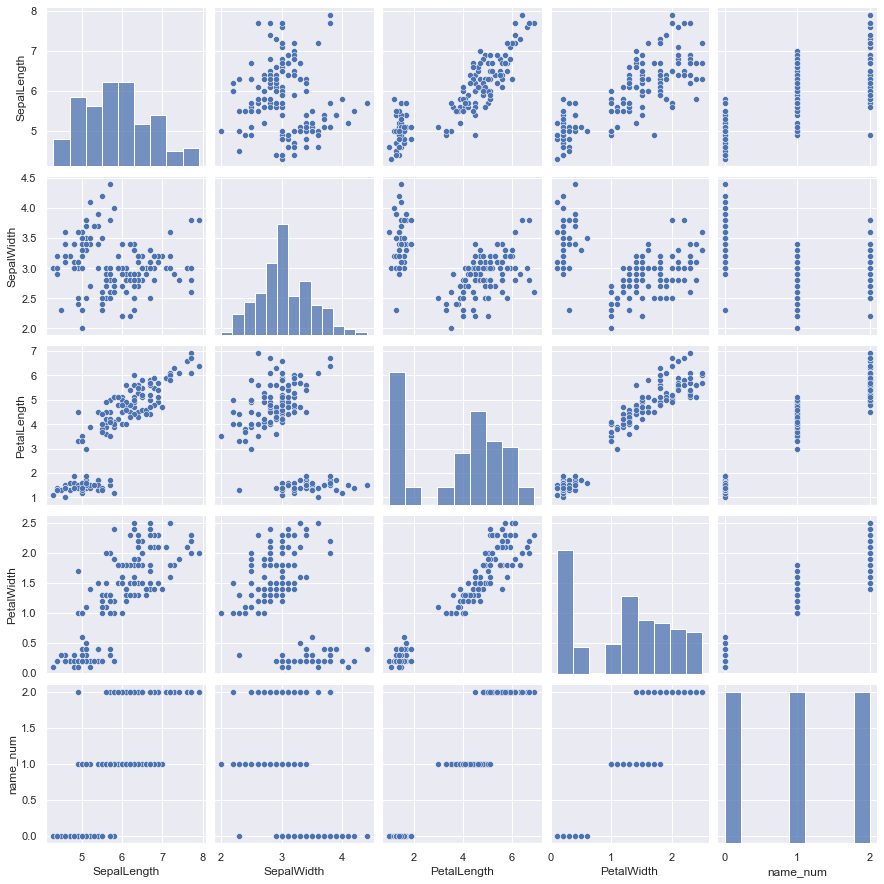

In [28]:
sns.pairplot(df);

Eliminamos la columnas que describe a la especie de la flor, ya que queremos trabajar solo en el espacio de features.

In [29]:
X = df.drop('name_num',axis= 1)

Reduciremos un data set de 4 features a uno de 2 utilizando PCA con 2 componentes

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Cada fila de esta matriz, representa un vector. Los vectores son ortogonales entre sí.

In [32]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Veamos la varianza capturada por cada uno de los componentes (en relativos). ¿Cuánto deberían sumar la proporción de varianza explicada por estos dos componentes?

In [33]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 2. PCA para visualización

En algunos casos tenemos conjuntos de datos con muchas variables. 
En general, es difícil representar estos datos en un gráfico para ver si se encuentran dispersos, cercanos, agrupados, etc.

Graficar los componentes principales permite una visualización en estos casos.

Es importante normalizar los datos antes de ajustar un PCA

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(X)

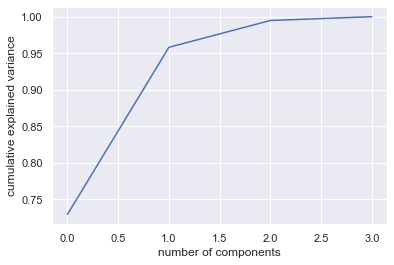

In [39]:
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
#plt.ylim(0,1)
plt.ylabel('cumulative explained variance');

In [40]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [41]:
# suma de varianza de los primeros dos componentes
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9581320720000164

Ahora estamos en condiciones de generar un gráfico en 2 dimensiones que explique en un 95% la información contenida en 4 dimensiones

In [36]:
pca = PCA(n_components=2)
pca.fit_transform(scaled_data.transpose())

principalDf = pd.DataFrame(data = pca.components_ ).transpose()
principalDf.columns = ['pc1','pc2']
principalDf['clase'] = df.name_num

<Figure size 1080x1080 with 0 Axes>

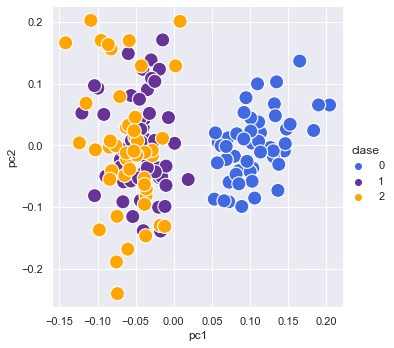

In [22]:
plt.figure(figsize=(15,15))

sns.relplot(x ='pc1',y='pc2', data=principalDf, hue='clase', 
            palette=['royalblue','rebeccapurple','orange'],s=200)
plt.show()

Como observamos la información que presenta el gráfico en 2 dimensiones esta bien representada por todos los cortes que vimos anteriormente en el pairplot. Esto se debe a que el algoritmo en 2 dimensiones es capaz de captar alto porcentaje de varianza contenido en las 4 dimensiones (4 features)